In [3]:
import numpy as np
import matplotlib.pyplot as plt
from simulation import *
from idea import dynamic_IDEA

In [4]:
random_state("rng_states/experiment1.npy")

In [5]:
S = [2, 5, 7, 3, 2, 5]
d = len(S)
x_min = -np.pi
x_max = np.pi
T = 6

rectangles = [((2, 4), (16, 7))]
rectangle_vs = [(-2.3, 0.)]
targets = [(0., 9.)] * T
rectangle_lists = rectangles_with_velocity(rectangles, rectangle_vs, T)
objective = dynamic_inverse_kinematics_objectives(S, targets, rectangle_lists)
n_constraints = len(rectangles)

n = 200
alpha_inf = 0.7
n_immigrants = 140
eta_c = 3.
eta_m = 15.
p_c = 0.8
p_m = 0.05
num_iterations_init = 60
num_iterations = 100

population_hist, score_hist = dynamic_IDEA(objective, n_constraints, T, x_min, x_max, d, n, alpha_inf, eta_c, eta_m, p_c, p_m,
                           num_iterations=num_iterations, num_iterations_init=num_iterations_init, n_immigrants=n_immigrants, log_interval=20)

t=0
Iteration 0, #feasible: 106, best: [0.33407577], #infeasible: 94, best: [1.0679011 1.       ]


/home/i291318/Dynamic-inverse-kinematics/simulation.py:34: RuntimeWarning: divide by zero encountered in true_divide
  t = _vector_product(x2 - x1, d2) / rs
/home/i291318/Dynamic-inverse-kinematics/simulation.py:35: RuntimeWarning: divide by zero encountered in true_divide
  u = _vector_product(x2 - x1, d1) / rs


Iteration 20, #feasible: 60, best: [0.00026002], #infeasible: 140, best: [0.00480043 1.        ]
Iteration 40, #feasible: 60, best: [4.28107051e-08], #infeasible: 140, best: [2.03536302e-04 1.00000000e+00]
Iteration 59, #feasible: 60, best: [7.9255576e-12], #infeasible: 140, best: [3.01345563e-05 1.00000000e+00]
t=1
Iteration 0, #feasible: 60, best: [0.20462717], #infeasible: 140, best: [5.05802754e-12 1.00000000e+00]
Iteration 20, #feasible: 60, best: [0.00063766], #infeasible: 140, best: [1.08101807e-15 1.00000000e+00]
Iteration 40, #feasible: 60, best: [0.00063766], #infeasible: 140, best: [6.81764872e-16 1.00000000e+00]
Iteration 60, #feasible: 60, best: [8.91471167e-05], #infeasible: 140, best: [1.92825868e-17 1.00000000e+00]
Iteration 80, #feasible: 60, best: [8.91471167e-05], #infeasible: 140, best: [8.13194582e-18 1.00000000e+00]
Iteration 99, #feasible: 60, best: [1.15559368e-05], #infeasible: 140, best: [1.36025086e-18 1.00000000e+00]
t=2
Iteration 0, #feasible: 60, best: [2.

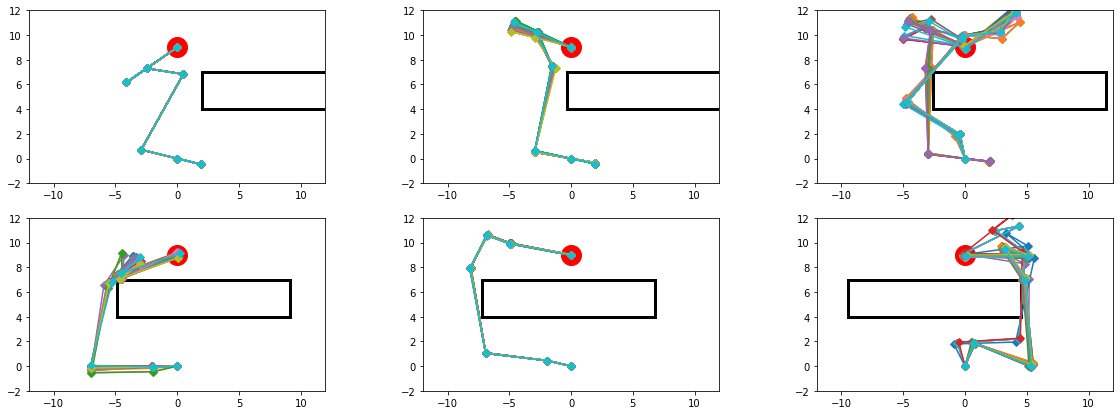

In [6]:
feasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    feasible_population = populations[-1][mask, :]
    feasible_populations.append(feasible_population)

draw_dynamic_solutions(feasible_populations, S, targets, rectangle_lists, np.arange(T),
                       nrows=2, ncols=3, figsize=(20, 7), xlim=(-12, 12), ylim=(-2, 12))

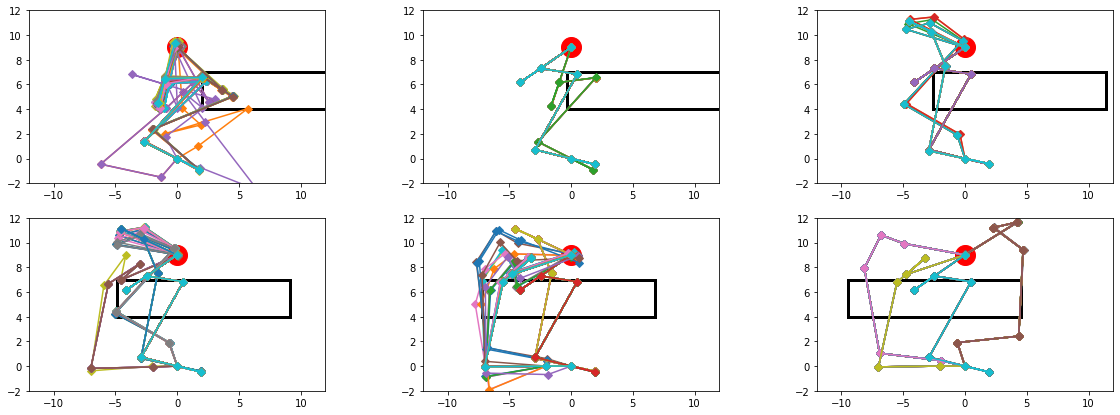

In [7]:
infeasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    infeasible_population = populations[-1][~mask, :]
    infeasible_populations.append(infeasible_population)

draw_dynamic_solutions(infeasible_populations, S, targets, rectangle_lists, np.arange(T),
                       nrows=2, ncols=3, figsize=(20, 7), xlim=(-12, 12), ylim=(-2, 12))